# Comparison with Observations: 
## Mean Absolute Percent Error and Normilized Forecast Metric Calculations

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#4-mean-comparison)

5. [Bias of a different models]()

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

FDB5 binary library not present on system, disabling FDB support.


#### ICON, ngc3028, lra

In [2]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()

#### IFS, tco2559-ng5, lra

In [3]:
reader              = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()

#### IFS, tco1279-orca025-cycle3, lra

In [4]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()

#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- **trop_lat=15**:      The latitude band of the tropical area 
- **num_of_bins=20**:   The number of bins in the histogram
- **first_edge = 0**:   The left edge of the first bin
- **width_of_bin**:     The width of each bin

In [6]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-3)/40)

## 2. Comparison of histograms

In [7]:
path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/"

In [13]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-08 13:22:28 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [14]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-08 13:22:30 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [15]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-08 13:22:33 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


In [16]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100")

/work/bb1153/b382267/mamba_dir/mambaforge/envs/aqua/lib/python3.10/site-packages/dask/array/core.py:3471: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  warnings.warn(
2023-07-08 13:22:55 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/ already exists


#### Units of precipitation: mm  day**-1

2023-07-08 13:23:02 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


{<Axes: title={'center': 'Monthly, 1 degree res (100km)'}, xlabel='Precipitation, [mm/day]', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

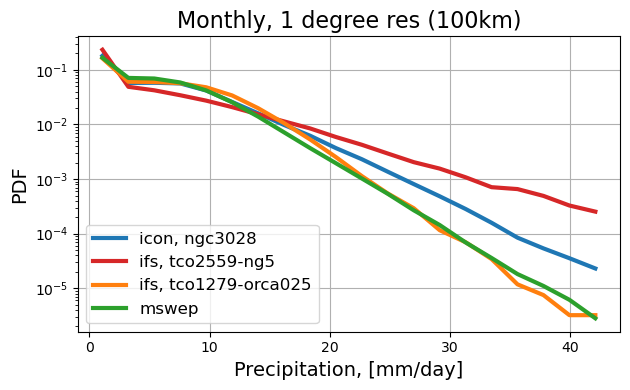

In [17]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=0.8, 
                new_unit="mm/day",
                legend='icon, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="mm/day",
                legend='ifs, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="mm/day",
                legend='ifs, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="mm/day",
                legend='mswep',
                plot_title='Monthly, 1 degree res (100km)', loc='lower left', 
                path_to_pdf=path_to_pdf, 
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Mean comparison

### Along longitude

2023-07-08 17:58:56 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


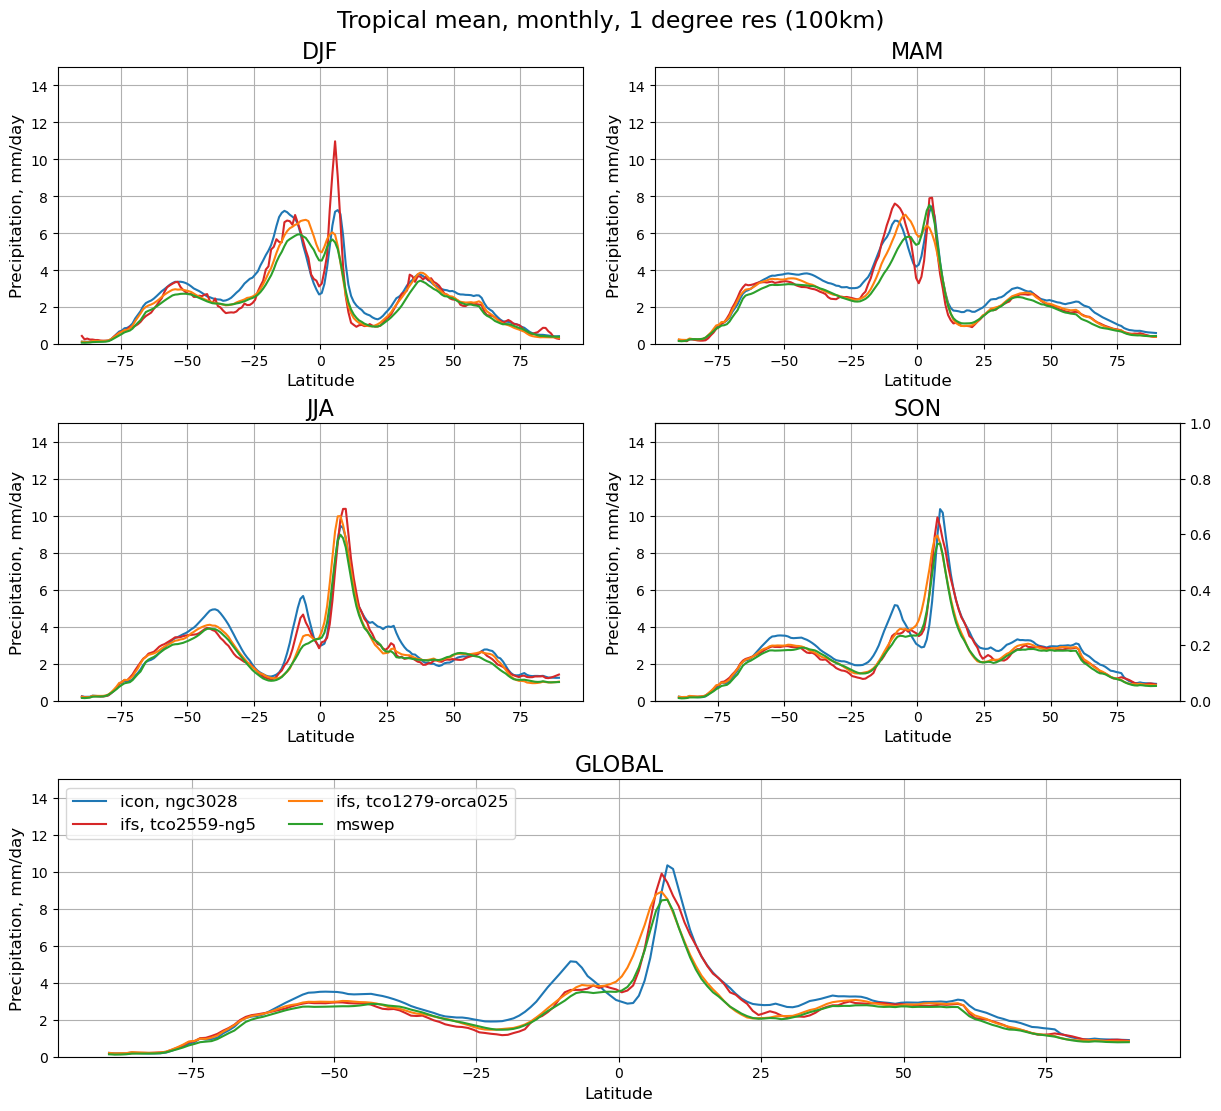

In [9]:
coord = 'lon'
diag.trop_lat=90
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='icon, ngc3028',         color='tab:blue', figsize=1.1,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='ifs, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='ifs, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='mswep',                 color='tab:green',                  new_unit = 'mm/day',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf, 
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

2023-07-08 18:25:01 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


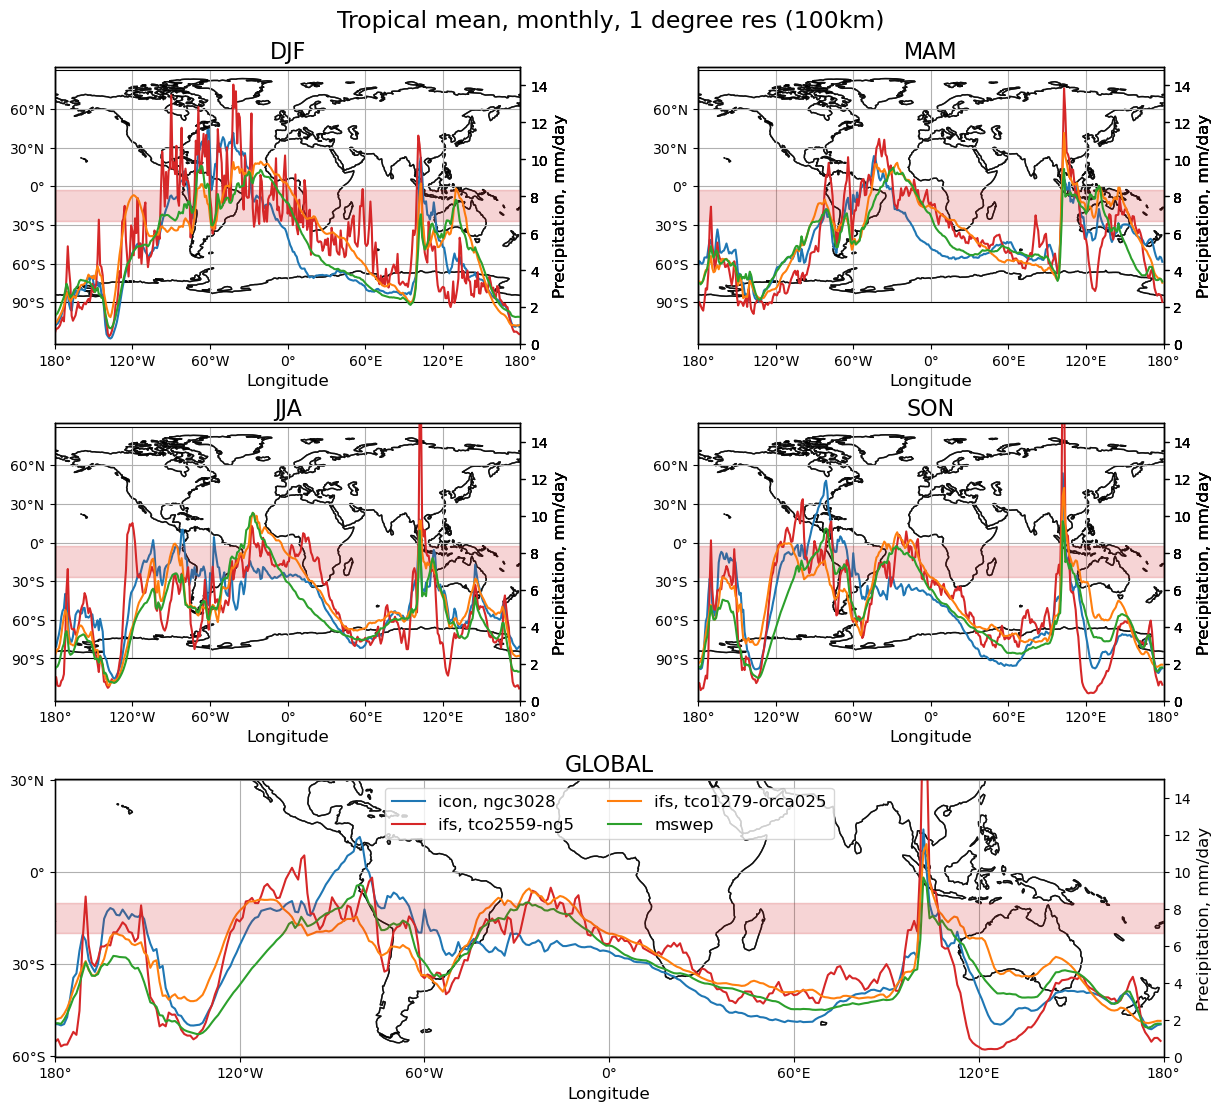

In [9]:
coord = 'lat'
diag.trop_lat=10
add = diag.mean_and_median_plot(icon_ngc3028,                   coord=coord,  
                                legend='icon, ngc3028',         color='tab:blue', figsize=1.1,      new_unit = 'mm/day' )

add = diag.mean_and_median_plot(ifs_tco2559_ng5,    fig=add,    coord=coord,  
                                legend='ifs, tco2559-ng5',      color='tab:red',                    new_unit = 'mm/day')

add = diag.mean_and_median_plot(ifs_tco1279_orca025,fig=add,    coord=coord,  
                                legend='ifs, tco1279-orca025', color='tab:orange',                  new_unit = 'mm/day')

add = diag.mean_and_median_plot(mswep_mon,          fig=add,    coord=coord,  
                                legend='mswep',                 color='tab:green',                  new_unit = 'mm/day',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper center',
                                path_to_pdf=path_to_pdf, 
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

## 4. Calculation of a bias between climatological model and observations

2023-07-08 18:12:07 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


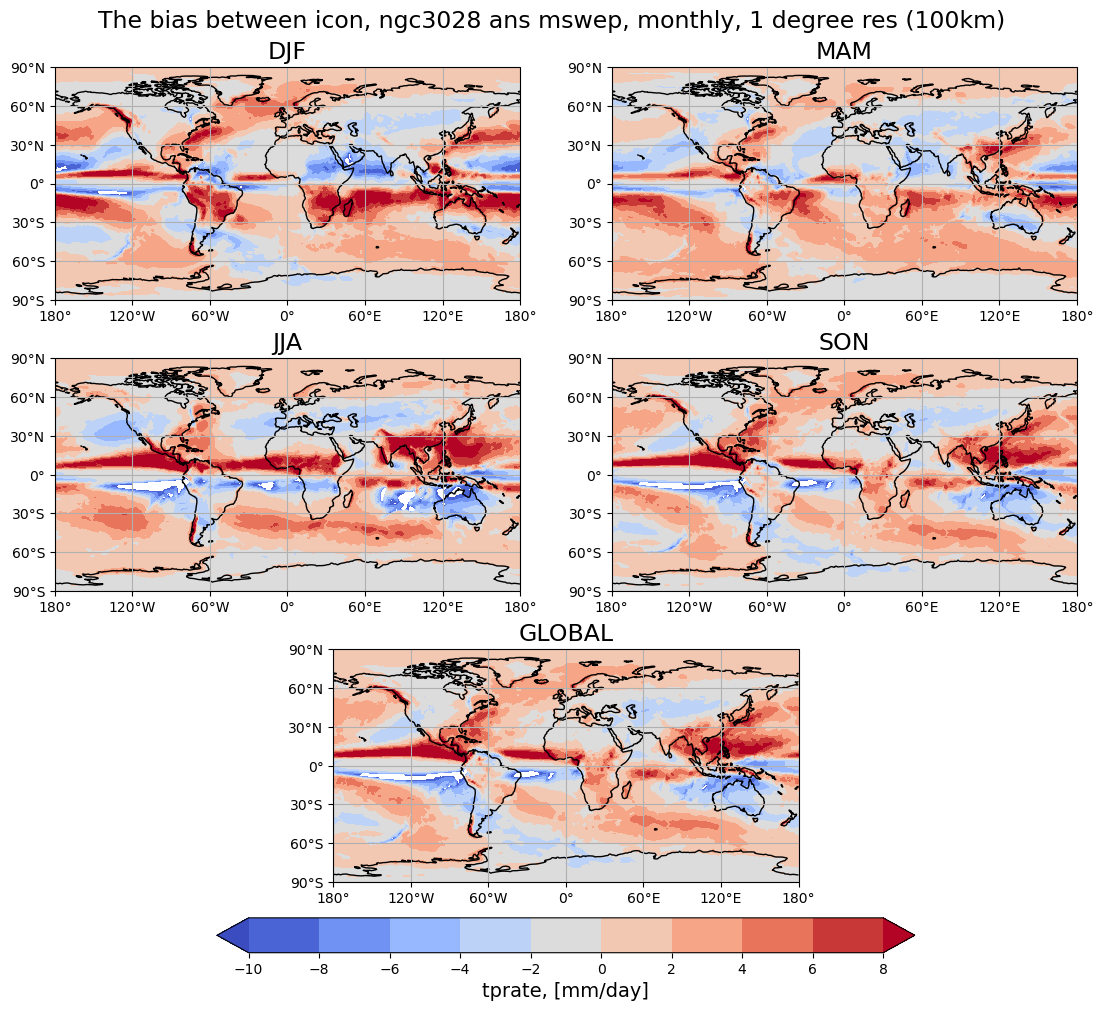

In [9]:
diag.plot_bias(icon_ngc3028, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between icon, ngc3028 ans mswep, monthly, 1 degree res (100km)',
                    path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

2023-07-08 15:46:56 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


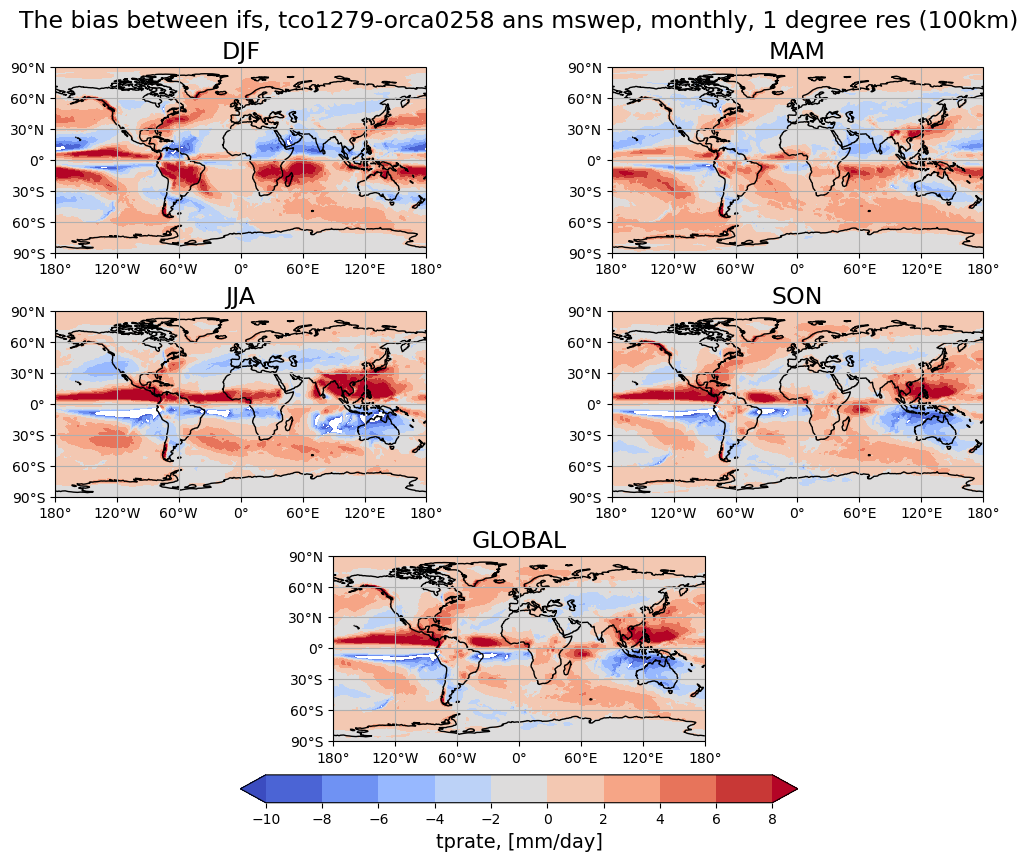

In [13]:
diag.plot_bias(ifs_tco1279_orca025, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between ifs, tco1279-orca0258 ans mswep, monthly, 1 degree res (100km)',
                    path_to_pdf=path_to_pdf, name_of_file='ifs_tco1279_orca0258_mswep_lra_r100_monthly_bias')

2023-07-08 15:48:09 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/PDF/ already exists


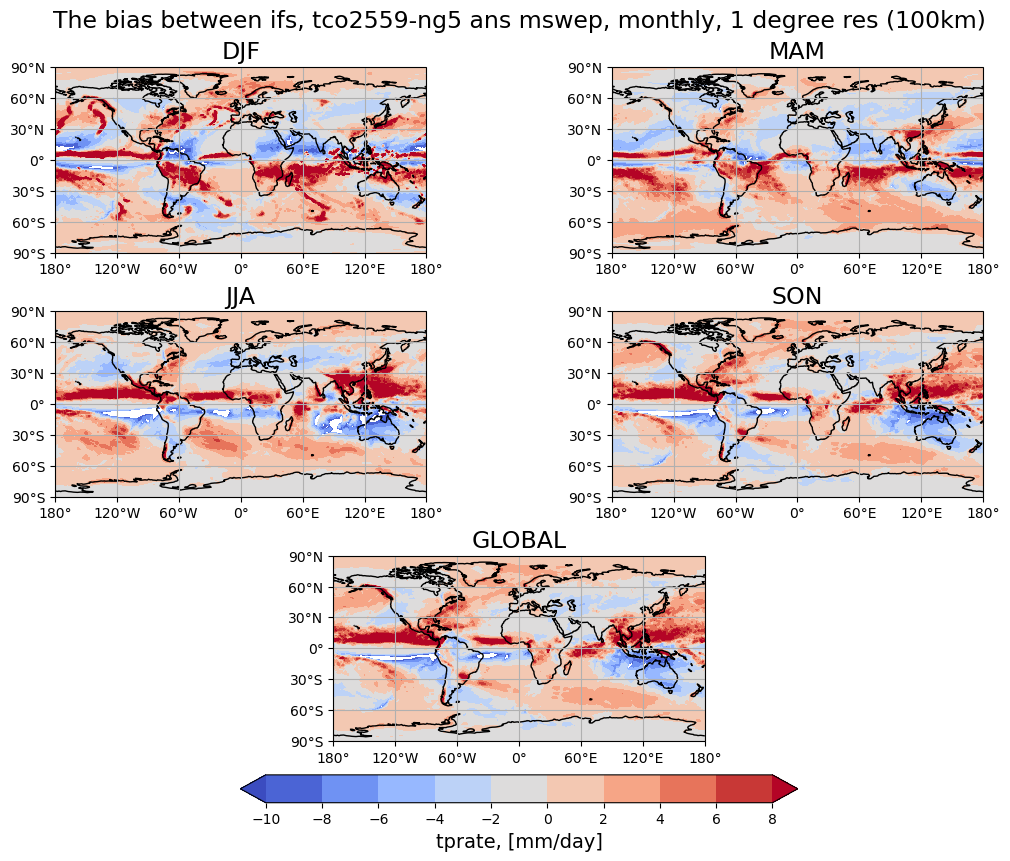

In [14]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-10, vmax=10,
                    plot_title='The bias between ifs, tco2559-ng5 ans mswep, monthly, 1 degree res (100km)',
                    path_to_pdf=path_to_pdf, name_of_file='tco2559-ng5_mswep_lra_r100_monthly_bias')

#

##### The end